In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"/content/drive/MyDrive/PCA_50_features new.csv")
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,result
43788,7.879402,0.351115,4.642614,1.526905,-1.136132,1.361161,-0.258469,-4.002486,-2.906107,-3.738978,...,-1.319221,0.876868,-0.175465,-1.444855,0.299355,0.187610,-0.687840,-0.012175,1.106331,0
47564,-7.796399,0.135709,-0.806259,-2.748916,1.013921,-0.787532,0.447175,-0.827630,-0.730237,-0.134734,...,-0.425844,-0.237494,0.824227,-0.179987,0.203159,-0.295988,0.504243,0.712491,-0.168951,0
32847,59.171030,-15.220650,-14.714456,7.627727,-14.726160,2.332327,-1.639517,12.011121,1.960256,-8.279439,...,-0.671185,-0.613273,-0.004366,2.375469,-0.798667,1.140875,2.376578,-1.702101,-0.871881,0
26431,-7.404378,-1.297339,2.263917,1.043777,0.661458,1.590174,0.452300,-0.974483,-0.218640,-0.208282,...,-0.081893,0.197286,-1.025022,0.188170,-0.625935,0.392094,0.273983,0.456564,-0.200754,0
2746,-3.794866,0.086229,-1.390144,-1.511297,-0.906305,0.770068,-0.238584,-0.648103,0.609197,-0.463606,...,-0.500175,0.126664,0.568697,0.381518,0.775369,-0.931927,-0.110757,0.965482,-0.138742,0


In [7]:
df.result.value_counts()

0    42209
1     5667
Name: result, dtype: int64

In [8]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 3.8 MB/s 


In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow_addons import losses



In [30]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=50, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [11]:
X = df.drop('result',axis='columns')
y = df['result']

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    42209
1    42209
Name: result, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [14]:
# Number of classes in training Data
y_train.value_counts()

0    33767
1    33767
Name: result, dtype: int64

ARTIFICIAL NEURAL NETWORK MODEL

In [32]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
2111/2111 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.7741
Epoch 2/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.3688 - accuracy: 0.8352
Epoch 3/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.3320 - accuracy: 0.8553
Epoch 4/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8665
Epoch 5/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8740
Epoch 6/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.2849 - accuracy: 0.8788
Epoch 7/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8843
Epoch 8/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8868
Epoch 9/100
2111/2111 [==============================] - 3s 2ms/step - loss: 0.2632 - accuracy: 0.8905
Epoch 10/100
2111/2111 [==============================] - 3s 2ms/step - l

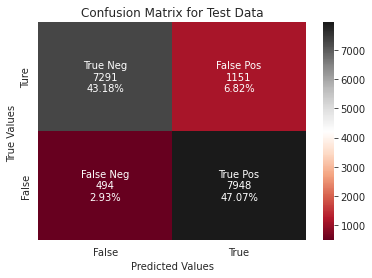

In [33]:

cf_matrix = confusion_matrix(y_test, y_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

1. XGBOOST CLASSIFIER 

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.39%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.834225      0.814215  0.823911      0.824220      0.824220
recall         0.808482      0.839340  0.823911      0.823911      0.823911
f1-score       0.821151      0.826587  0.823911      0.823869      0.823869
support    33767.000000  33767.000000  0.823911  67534.000000  67534.000000
_______________________________________________
Confusion Matrix: 
 [[27300  6467]
 [ 5425 28342]]

Test Result:
Accuracy Score: 81.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.831450     0.808554  0.819593      0.820002      0.820002
recall        0.801706     0.837479  0.819593      0.819593      0.819593
f1-score      0.816307     0.822763  0.819593      0.819535      0.819535
support  

CONFUSION MATRIX FOR TESTING

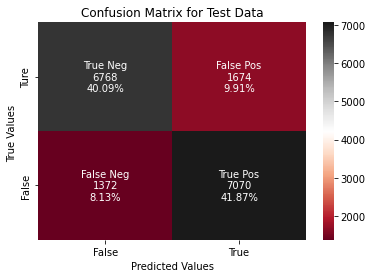

In [ ]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

ROC FOR TESTING

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8962953295143624

**2. LightGBM Classifier**

In [16]:
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train, y_train)

print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.906059      0.890467  0.898111      0.898263      0.898263
recall         0.888323      0.907898  0.898111      0.898111      0.898111
f1-score       0.897103      0.899098  0.898111      0.898101      0.898101
support    33767.000000  33767.000000  0.898111  67534.000000  67534.000000
_______________________________________________
Confusion Matrix: 
 [[29996  3771]
 [ 3110 30657]]

Test Result:
Accuracy Score: 88.26%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.889519     0.875829  0.882552      0.882674      0.882674
recall        0.873608     0.891495  0.882552      0.882552      0.882552
f1-score      0.881492     0.883593  0.882552      0.882542      0.882542
support  

**CONFUSION MATRIX FOR TEST OF LGBM**

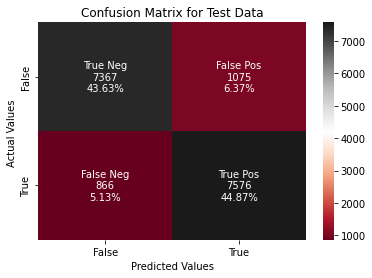

In [ ]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**ROC FOR TEST OF LGBM**

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.952001844771472

**3. SUPPORT VECTOR METHOD**





In [18]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.87%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.940325      0.899060  0.918678      0.919692      0.919692
recall         0.894098      0.943258  0.918678      0.918678      0.918678
f1-score       0.916629      0.920629  0.918678      0.918629      0.918629
support    33767.000000  33767.000000  0.918678  67534.000000  67534.000000
_______________________________________________
Confusion Matrix: 
 [[30191  3576]
 [ 1916 31851]]

Test Result:
Accuracy Score: 90.45%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.932826     0.879698  0.904525      0.906262      0.906262
recall        0.871831     0.937219  0.904525      0.904525      0.904525
f1-score      0.901298     0.907548  0.904525      0.904423      0.904423
support  

CONFUSION MATRIX FOR TEST OF SVM

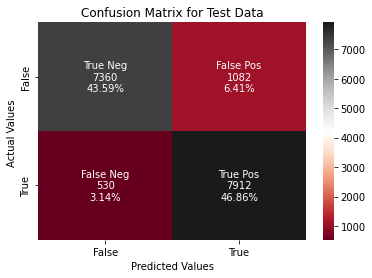

In [19]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ROC OF TEST FOR SVM

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9659754358250152

4. KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.65%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.952702      0.767708  0.836453      0.860205      0.860205
recall         0.708058      0.964847  0.836453      0.836453      0.836453
f1-score       0.812361      0.855062  0.836453      0.833711      0.833711
support    33767.000000  33767.000000  0.836453  67534.000000  67534.000000
_______________________________________________
Confusion Matrix: 
 [[23909  9858]
 [ 1187 32580]]

Test Result:
Accuracy Score: 82.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.944062     0.760263  0.828181      0.852162      0.852162
recall        0.697702     0.958659  0.828181      0.828181      0.828181
f1-score      0.802398     0.848012  0.828181      0.825205      0.825205
support  

**KNN CONFUSION MATRIX FOR TEST**

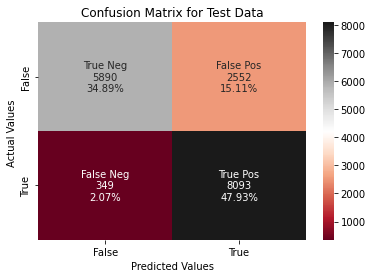

In [22]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

KNN-ROC FOR TESTING

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9467241064226818

**k-NN: Varying Number of Neighbors**

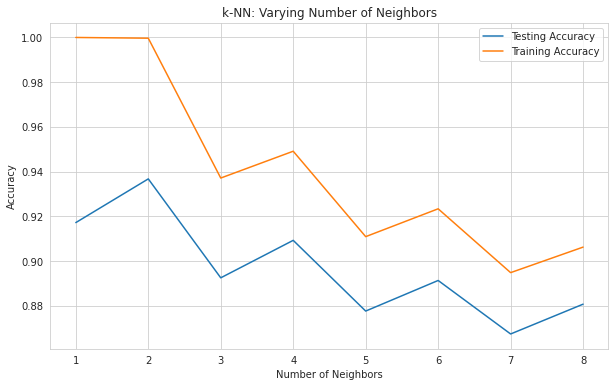

In [24]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**5. GRADIENT BOOSTING CLASSIFIER**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.835850      0.817941   0.82665      0.826896      0.826896
recall         0.812953      0.840347   0.82665      0.826650      0.826650
f1-score       0.824243      0.828993   0.82665      0.826618      0.826618
support    33767.000000  33767.000000   0.82665  67534.000000  67534.000000
_______________________________________________
Confusion Matrix: 
 [[27451  6316]
 [ 5391 28376]]

Test Result:
Accuracy Score: 82.46%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.836216     0.813810  0.824627      0.825013      0.825013
recall        0.807392     0.841862  0.824627      0.824627      0.824627
f1-score      0.821551     0.827598  0.824627      0.824575      0.824575
support  

**GBC- CONFUSION MATRIX FOR TESTING**

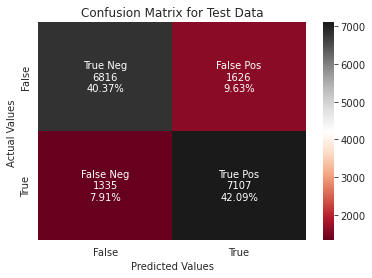

In [26]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**GBC- ROC FOR TESTING**

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9012934728440357